<a href="https://colab.research.google.com/github/Marukos/Operational-Research/blob/main/Operational_Research_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Άσκηση 1


Ξεκινάμε κατεβάζοντας και φορτώνοντας τη βάση δεδομένων που θα έχουμε να επεξεργαστούμε για το πρόβλημα μας.


In [ ]:
!gdown --id 1qklC6HBqynRmhn5q-zY3Ov2a0jcCwT9s

import pandas as pd

data = pd.read_csv('/content/GroceriesInitial.csv', header = 0)
data.head()

Downloading...
From: https://drive.google.com/uc?id=1qklC6HBqynRmhn5q-zY3Ov2a0jcCwT9s
To: /content/GroceriesInitial.csv
100% 823k/823k [00:00<00:00, 114MB/s]


,id,basket_value,recency_days,Item_1,Item_2,Item_3,Item_4,Item_5,Item_6,Item_7,...,Item_23,Item_24,Item_25,Item_26,Item_27,Item_28,Item_29,Item_30,Item_31,Item_32
0,1,1.1,2,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,3.6,31,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1.2,7,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,6.6,7,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2.5,66,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Σειρά έχει να της δώσουμε τη κατάλληλη μορφή, δηλαδή τη δυαδική μορφή συναλλαγών.

In [ ]:
# !!!! Approximately 15 minutes !!!!

#These are all the products we are interested in
products = ['citrus fruit', 'tropical fruit', 'whole milk', 'other vegetables',
           'rolls/buns', 'chocolate', 'bottled water', 'yogurt','sausage', 'root vegetables', 'pastry', 'soda', 'cream']
#and these are all the elements we care for combined.
baskets = [['id', 'basket_value', 'recency_days']]
for i in range (0,13):
  baskets[0].append(products[i])

for i in range(0, 7536):
  temp = []
  items = []
  for j in range(0,35):
    if j<3:
      temp.append(data.values[i,j])
    else:
      items.append(data.values[i,j])
  for k in range(0,13):
    if products[k] in items:
      temp.append(1)
    else:
      temp.append(0)
  baskets.append(temp)

Αποφασίζουμε πως θα χωρίσουμε τα καλάθια μας σε low_basket_value, medium_basket_value και high_basket_value. Πρώτα θα κάνουνε ένα violin plot για να μελετήσουμε τη διασπορά στις τιμές των καλαθιών μας.


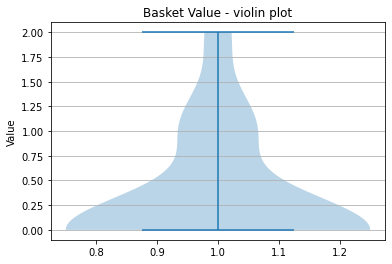

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots()

axes.violinplot(baskets[1])

axes.set_title('Basket Value - violin plot')
axes.yaxis.grid(True)
axes.set_ylabel('Value')

plt.show()

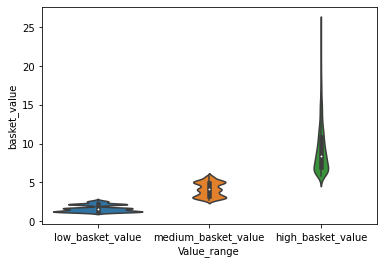

In [ ]:
import seaborn as sns

baskets_df = pd.DataFrame(baskets[1:], columns = baskets[0])
sorted_df = baskets_df.sort_values('basket_value')

target = []
for i in range (0,7536):
  if i < 2512:
    target.append('low_basket_value')
  elif i < 5024:
    target.append('medium_basket_value')
  else:
    target.append('high_basket_value')

sorted_df.insert(len(sorted_df.columns),'Value_range',target)

sns.violinplot(x='Value_range', y='basket_value', data=sorted_df)

Αυτό που παρατηρούμε από τα δύο προηγούμενα plot είναι τα εξής:
  1. Έχουμε πολλά περισσότερα δείγματα στα καλάθια μέχρι αξίας των 5 ευρώ και όσο αυξάνεται η τιμή τόσο μειώνονται τα δείγματα.
  
  2. Αν χωρίσουμε τα δείμγατα με ισοπληθής τρόπο αρχικά παρατηρούμε πως ορισμένα καλάθια παρόλο που έχουν ίδιες τιμές ανήκουν σε διαφορετικές κατηγορίες. Επιπλέον, όσο αυξάνεται η τιμή τόσο αυξάνεται και το εύρος του διαστήματος και έτσι συμπεραίνουμε πως αυτός δεν είναι ένας καλός χωρισμός των δειγμάτων.

In [ ]:
import numpy as np

# baskets_df = baskets_df.drop('Value_range',axis=1)

target = []
for i in range (0,7536):
  if baskets_df['basket_value'][i] < np.mean(baskets_df['basket_value']) - 2.2:
    target.append('low_basket_value')
  elif baskets_df['basket_value'][i] < np.mean(baskets_df['basket_value']) + 1.2:
    target.append('medium_basket_value')
  else:
    target.append('high_basket_value')

baskets_df.insert(len(baskets_df.columns),'Value_range',target)

baskets_df.head()

,id,basket_value,recency_days,citrus fruit,tropical fruit,whole milk,other vegetables,rolls/buns,chocolate,bottled water,yogurt,sausage,root vegetables,pastry,soda,cream,Value_range
0,1,1.1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,low_basket_value
1,2,3.6,31,0,1,0,0,0,0,0,1,0,0,0,0,0,medium_basket_value
2,3,1.2,7,0,0,1,0,0,0,0,0,0,0,0,0,0,low_basket_value
3,4,6.6,7,0,0,0,0,0,0,0,1,0,0,0,0,0,high_basket_value
4,5,2.5,66,0,0,1,1,0,0,0,0,0,0,0,0,0,low_basket_value


Ένας λίγο καλύτερος τρόπος για να τα χωρίσουμε τα δείγματα μας σύμφωνα με την αξία τους είναι αυτός, δηλαδή παίρνοντας διαστήματα γύρω από τη μέση τιμή του κόστους του καλαθιού. Θα χρησιμοποιηθεί αυτό το dataset, ωστόσο σε αυτό το σημείο να αναφερθεί πως ένας καλύτερος διαχωρισμός που θα μπορούσε να γίνει θα προυπέθετε να μην είναι είναι σχεδόν ισοπληθείς οι κλάσεις και για παράδειγμα τα περισσότερα δείγματα θα άνηκαν στη low_basket_value, τα αμέσως λιγότερα στη medium_basket_value και συνεπώς τα λιγότερα στη high_basket_value. Όμως, δεν θα το κάνουμε αυτό ώστε να μη μειώσουμε κατά πολύ το support του high_basket_value και αυξήσουμε του low_basket_value.

Κάπως έτσι πιστεύω θα έμοιαζε αυτός ο καλύτερος χωρισμός των δειγμάτων:



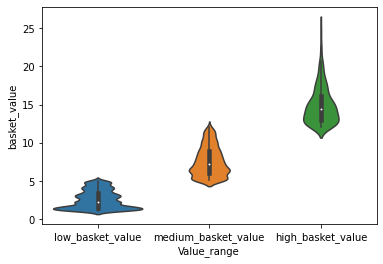

In [ ]:
example = pd.DataFrame(baskets[1:], columns = baskets[0])

target = []
for i in range (0,7536):
  if baskets_df['basket_value'][i] < np.mean(baskets_df['basket_value']):
    target.append('low_basket_value')
  elif baskets_df['basket_value'][i] < np.mean(baskets_df['basket_value']) + 7:
    target.append('medium_basket_value')
  else:
    target.append('high_basket_value')

example.insert(len(example.columns),'Value_range',target)

sns.violinplot(x='Value_range', y='basket_value', data=example)

# Άσκηση 2

In [ ]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

Δίνουμε τη κατάλληλη μορφή στα δεδομένα ώστε να μπορούν να τα παραχθούν τα επιθυμητά αποτελέσματα με τη χρήση των παραπάνω βιβλιοθηκών. Πρώτα χρησιμοποιούμε το μέρος του dataset που περιέχει μόνο τα προϊόντα.

In [ ]:
value_ranges = baskets_df['Value_range'].values.tolist()
ex2_dataset = baskets_df.drop(['id','recency_days','basket_value','Value_range'],axis=1)


Ύστερα από πολλές δοκιμές η τιμή για την ελάχιστη υποστήριξη στην οποία καταλήξαμε ήταν το 0.025, δηλαδή το στοιχείο που μας ενδιαφέρει να εμφανίζεται τουλάχιστον στο 2.5% του συνόλου των συναλλαγών μας. Διαλέξαμε τη συγκεκριμένη τιμή ώστε να μη παράγονται πολύ λίγα σύνολα αντικείμένων, καθώς θέλουμε να παράξουμε τουλάχιστον 20 κανόνες. Με τη συγκεκριμένη τιμή παράγονται 51 σύνολα αντικειμένων και 88 κανόνες. Ένας λόγος ακόμη που μας οδήγησε στην επιλογή της συγκεκριμένης τιμής ήταν να έχουμε έστω μερικούς κανόνες που να έχουν τουλάχιστον 2 στοιχεία στο αριστερό μέρος τους και ομοίως και για το δεξί μέρος. Ωστόσο, δεν πρέπει να υπάρχει κανόνας που να είναι από δύο σε δύο στοιχεία.

In [ ]:
freqItemSets = apriori(ex2_dataset, min_support=0.025, use_colnames=True)

Παρακάτω παρατηρούμε τα πιο συχνά σύνολα, δηλαδή τα σύνολα αντικειμένων με υποστήριξη μεγαλύτερη από το κατώφλι που έχουμε ορίσει.

In [ ]:
freqItemSets.sort_values(by="support", ascending=False)

,support,itemsets
2,0.333466,(whole milk)
3,0.252521,(other vegetables)
4,0.240048,(rolls/buns)
11,0.227574,(soda)
7,0.182059,(yogurt)
6,0.144241,(bottled water)
9,0.142251,(root vegetables)
1,0.136943,(tropical fruit)
8,0.122611,(sausage)
10,0.116109,(pastry)


Εδώ παρατηρούμε τους κανόνες τους οποίους παράγονται σύμφωνα με τα προηγούμενα σύνολα (δηλαδή χρησιμοποιώντας το προηγούμενο support) και ορίζοντας τώρα τη μετρική που θα χρησιμοποιήσουμε και το κατώφλι της. Επίσης, μας παρουσιάζει και τα αποτελέσματα των υπόλοιπων μετρικών (lift, leverage, conviction) για τους συγκεκριμένος κανόνες.

Τα αποτελέσματα που μας εμφανίζονται είναι ταξινομημένα βάσει του confidence και είναι μόνο τα πρώτα 20, αυτά που μας ενδιαφέρει να σχολιάσουμε κιόλας δηλαδή.

Παρατηρώντας τους κανόνες που παράγονται στο παρακάτω πίνακα, υποθέτοντας πως τα δεδομένα μας βασίζονται στον πραγματικό κόσμο, δεν μας κάνει καθόλου εντύπωση που στους περισσότερους κανόνες, είτε στο δεξί, είτε στο αριστερό μέλος υπάρχει το whole_milk, καθώς είναι ένα αγαθό που αγοράζεται πολύ συχνά σχεδόν από κάθε νοικοκυριό. Αν έστω πως τα δεδομένα μας δεν βασίζονται στον πραγματικό κόσμο, πάλι το ίδιο αποτέλεσμα θα περιμέναμε, καθώς το whole_milk είναι το στοιχείο με το μεγαλύτερο support και υπάρχει στο 1/3 του συνόλου των συναλλαγών μας.

Επίσης, αν λάβουμε τη σύβαση του πραγματικού κόσμου, δεν μας κάνει εντύπωση πως τα root_vegetables εμφανίζονται πολύ συχνά με τα other_vegetables, καθώς πολύ πιθανόν να πωλούνται σε κοινά τμήματα ενός καταστήματος, ομοίως και το yogurt με το whole_milk.

Αυτό που όμως μας κάνει εντύπωση παρόλα αυτά, είναι πως αντικείμενα όπως το rolls/buns και το soda που έχουν υψηλή υποστήριξη, περίπου το 1/4 του συνόλου των συναλλαγών, δεν συναντώνται σχεδόν σε κανέναν από αυτούς τους κανόνες. Πράγμα που μπορεί να σημαίνει πως πολλές φορές, ίσως, να αγοράζονται μόνα τους.



In [ ]:
association_rules(freqItemSets, metric="confidence", min_threshold=0.0).sort_values(by="confidence", ascending=False).head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
77,"(yogurt, other vegetables)",(whole milk),0.056661,0.333466,0.029061,0.512881,1.538029,0.010166,1.368317
84,"(root vegetables, other vegetables)",(whole milk),0.061837,0.333466,0.030255,0.489270,1.467227,0.009634,1.305062
82,"(whole milk, root vegetables)",(other vegetables),0.063827,0.252521,0.030255,0.474012,1.877119,0.014137,1.421096
31,(root vegetables),(whole milk),0.142251,0.333466,0.063827,0.448694,1.345546,0.016391,1.209009
44,(root vegetables),(other vegetables),0.142251,0.252521,0.061837,0.434701,1.721445,0.025915,1.322273
8,(tropical fruit),(whole milk),0.136943,0.333466,0.055202,0.403101,1.208821,0.009536,1.116661
26,(yogurt),(whole milk),0.182059,0.333466,0.073116,0.401603,1.204331,0.012405,1.113867
76,"(yogurt, whole milk)",(other vegetables),0.073116,0.252521,0.029061,0.397459,1.573963,0.010597,1.240545
21,(other vegetables),(whole milk),0.252521,0.333466,0.097665,0.386758,1.159812,0.013457,1.086902
32,(pastry),(whole milk),0.116109,0.333466,0.043392,0.373714,1.120697,0.004673,1.064265


Παρακάτω βλέπουμε και τους κανόνες από τις άλλες δύο μετρικές (lift και leverage) και παρατηρούμε πως οι κανόνες που προκύπτουν από αυτές δεν είναι οι περισσότεροι κοινοί με τη μετρική του confidence. Αυτό είναι λογικό να συμβαίνει, καθώς χρησιμοποιούν διαφορετικό τρόπο υπολογισμού για να δωσουν βαρύτητα αλλού. Εμείς στη συγκεκριμένη εργασία, όμως θα ενασχοληθούμε αποκλειστικά με το confidence.

In [ ]:
association_rules(freqItemSets, metric="lift", min_threshold=0.0).sort_values(by="lift", ascending=False).head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
86,(root vegetables),"(whole milk, other vegetables)",0.142251,0.097665,0.030255,0.212687,2.177726,0.016362,1.146094
83,"(whole milk, other vegetables)",(root vegetables),0.097665,0.142251,0.030255,0.309783,2.177726,0.016362,1.242724
82,"(whole milk, root vegetables)",(other vegetables),0.063827,0.252521,0.030255,0.474012,1.877119,0.014137,1.421096
87,(other vegetables),"(whole milk, root vegetables)",0.252521,0.063827,0.030255,0.119811,1.877119,0.014137,1.063604
1,(citrus fruit),(tropical fruit),0.108015,0.136943,0.026008,0.240786,1.758300,0.011217,1.136778
0,(tropical fruit),(citrus fruit),0.136943,0.108015,0.026008,0.189922,1.758300,0.011217,1.101111
45,(other vegetables),(root vegetables),0.252521,0.142251,0.061837,0.244877,1.721445,0.025915,1.135906
44,(root vegetables),(other vegetables),0.142251,0.252521,0.061837,0.434701,1.721445,0.025915,1.322273
79,(yogurt),"(whole milk, other vegetables)",0.182059,0.097665,0.029061,0.159621,1.634380,0.011280,1.073724
78,"(whole milk, other vegetables)",(yogurt),0.097665,0.182059,0.029061,0.297554,1.634380,0.011280,1.164418


In [ ]:
association_rules(freqItemSets, metric="leverage", min_threshold=0.0).sort_values(by="leverage", ascending=False).head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
28,(root vegetables),(other vegetables),0.142251,0.252521,0.061837,0.434701,1.721445,0.025915,1.322273
29,(other vegetables),(root vegetables),0.252521,0.142251,0.061837,0.244877,1.721445,0.025915,1.135906
20,(whole milk),(root vegetables),0.333466,0.142251,0.063827,0.191405,1.345546,0.016391,1.060790
21,(root vegetables),(whole milk),0.142251,0.333466,0.063827,0.448694,1.345546,0.016391,1.209009
58,(root vegetables),"(whole milk, other vegetables)",0.142251,0.097665,0.030255,0.212687,2.177726,0.016362,1.146094
55,"(whole milk, other vegetables)",(root vegetables),0.097665,0.142251,0.030255,0.309783,2.177726,0.016362,1.242724
59,(other vegetables),"(whole milk, root vegetables)",0.252521,0.063827,0.030255,0.119811,1.877119,0.014137,1.063604
54,"(whole milk, root vegetables)",(other vegetables),0.063827,0.252521,0.030255,0.474012,1.877119,0.014137,1.421096
16,(whole milk),(other vegetables),0.333466,0.252521,0.097665,0.292877,1.159812,0.013457,1.057070
17,(other vegetables),(whole milk),0.252521,0.333466,0.097665,0.386758,1.159812,0.013457,1.086902


Αφού αποφανθήκαμε για τα προϊόντα προσθέτουμε και τις διακριτές τιμές καλαθιών στα δεδομένα μας για να δούμε τις νέες συσχετίσεις που δημιουργούνται και πως η συγκεκριμένη μεταβλητή επηρεάζει τους κανόνες μας. Οπότε τώρα επαναλαμβάνουμε αυτή τη διαδικασία για το τροποποιημένο dataset μας.

In [ ]:
high = []
medium = []
low = []
for i in range (0,len(value_ranges)):
  if value_ranges[i] == 'low_basket_value' :
    high.append(0)
    medium.append(0)
    low.append(1)
  elif value_ranges[i] == 'medium_basket_value':
    high.append(0)
    medium.append(1)
    low.append(0)
  else:
    high.append(1)
    medium.append(0)
    low.append(0)

ex2_dataset.insert(0,'low_basket_value', low)
ex2_dataset.insert(0,'medium_basket_value', medium)
ex2_dataset.insert(0,'high_basket_value', high)

Εκτελούμε ξανά τη μέθοδο apriori με την ίδια τιμή του support, ώστε να μπορούμε να συγκρίνουμε τα αποτελέσματα μας με τα προηγούμενα.

In [ ]:
freqItemSets = apriori(ex2_dataset, min_support=0.025, use_colnames=True)

Αυτή τη φορά για minimun support 0.025 λαμβάνουμε 112 σύνολα αντικειμένων, δηλαδή 61 παραπάνω για τις 3 νέες στείλες που προσθέσαμε. Επίσης, παρατηρούμε πως τα νέα στοιχεία μας (low_basket_value, medium_basket_value, high_basket_value) ανήκουν στα πρώτα 4 με support περίπου ίσο του 1/3, καθώς είναι σχεδόν ισοπληθείς.

In [ ]:
freqItemSets.sort_values(by="support", ascending=False)

,support,itemsets
2,0.352840,(low_basket_value)
1,0.335722,(medium_basket_value)
5,0.333466,(whole milk)
0,0.311438,(high_basket_value)
6,0.252521,(other vegetables)
...,...,...
105,0.026274,"(high_basket_value, yogurt, root vegetables)"
45,0.026008,"(tropical fruit, citrus fruit)"
83,0.025743,"(high_basket_value, whole milk, citrus fruit)"
78,0.025610,"(yogurt, sausage)"


Πλέον στους κανόνες εμφανίζονται και πολλά προϊοντα που δεν συναντήσαμε στους προηγούμενους. Όμως, αυτό που είναι άξιο σχολιασμού είναι πως όλοι οι κανόνες στο δεξί τους μέρος έχουν αποκλειστικά το high_basket_value. Αυτό συμβαίνει, διότι παρόλο που τα καλάθια υψηλής αξίας είναι λιγότερα περιέχουν πάντοτε περισσότερα προιόντα και πιο συγκεκριμένα.

Επομένως, μπορούμε να αποφανθούμε για ποιο είναι πιθανόν το πιο ακριβό προϊόν. Από τους πρώτους κιόλας κανόνες συνειδητοποιούμε την συχνή εμφάνιση του sausage στο αριστερό μέρος των κανόνων και μάλιστα με αρκετά υψηλό confidence (έως και 1). Ωστόσο, ο κανόνας που επαληθεύει την υπόθεση μας είναι ο εξής: (sausage) -> (high_basket_value). Ο πρώτος κανόνας με το υψηλότερο confidence, που συνδέει μόνο ένα προϊόν με το high_basket_value. Οπότε, συμπεραίνουμε πως το αντικείμενο sausage είναι αυτό που πιο συχνά απ' όλα τα υπόλοιπα, όταν υπάρχει σε ένα καλάθι, αυτό θα είναι καλάθι υψηλής αξίας.
Συνεπώς, ειναί το προϊόν με τη μεγαλύτερη πιθανότητα να είναι το πιο ακριβό.

In [ ]:
association_rules(freqItemSets, metric="confidence", min_threshold=0.0).sort_values(by="confidence", ascending=False).head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
252,"(rolls/buns, pastry)",(high_basket_value),0.027335,0.311438,0.027335,1.000000,3.210908,0.018822,inf
264,"(yogurt, sausage)",(high_basket_value),0.025610,0.311438,0.025610,1.000000,3.210908,0.017634,inf
246,"(rolls/buns, sausage)",(high_basket_value),0.039942,0.311438,0.039942,1.000000,3.210908,0.027502,inf
282,"(sausage, soda)",(high_basket_value),0.031714,0.311438,0.031714,1.000000,3.210908,0.021837,inf
228,"(pastry, other vegetables)",(high_basket_value),0.029459,0.311438,0.027203,0.923423,2.965027,0.018028,8.991804
180,"(sausage, whole milk)",(high_basket_value),0.039013,0.311438,0.035430,0.908163,2.916028,0.023280,7.497670
216,"(sausage, other vegetables)",(high_basket_value),0.035165,0.311438,0.031714,0.901887,2.895875,0.020763,7.018031
192,"(pastry, whole milk)",(high_basket_value),0.043392,0.311438,0.036624,0.844037,2.710124,0.023110,4.414895
17,(sausage),(high_basket_value),0.122611,0.311438,0.099257,0.809524,2.599306,0.061071,3.614948
270,"(yogurt, root vegetables)",(high_basket_value),0.033705,0.311438,0.026274,0.779528,2.502991,0.015777,3.123119


# Άσκηση 3

Πρώτα ως συνήθως προσθέτουμε όλες τις βιβλιοθήκες που θα χρειαστούμε για τον αλγόριθμο Kmeans και για την περαιτέρω εξήγηση των αποτελεσμάτων του.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import numpy as np

Η έκτελεση του αλγορίθμου K-means είναι αρκετά απλή, αφού δεν χρειάζεται να την υλοποιήσουμε εμείς. Αφού δημιουργήσουμε ένα αντικείμενο της κλάσης K-means με τα κατάλληλα ορίσματα, μας μένει μόνο να κάνουμε fit και predict για τα δεδομένα μας. Τα δεδομένα μας για να τα δώσουμε στη συνάρτηση fit τα παίρνουμε από το Dataframe που δημιουργήσαμε στην αρχή με τα ονόματα των στειλών τους. Επίσης χρησιμοποιούμε random_state για να παράγουμε κάθε φορά τα ίδια αποτελέσματα.

Παρακάτω αφού εκτελέσουμε τον αλγόριθμο K-means με 5 κέντρα υπολογίζουμε 3 πράγματα:
1.   Το ποσοστό που αντιπροσωπεύει κάθε ομάδα από το σύνολο των συναλλαγών
2.   Τη μέση τιμή των κέντρων των ομάδων, δηλαδή βρίσκουμε ένα σημείο [x,y] όπου το x αναφέρεται στο recency_days και το y στο basket_value.
3.   Τη τυπική απόκλειση για τις δύο αυτές μεταβλητές.

Τα αποτελέσματα παρουσίαζονται και με τα κατάλληλα μηνύματα.


In [ ]:
kmeans = KMeans(n_clusters=5, random_state=8008)
ex3_dataset = baskets_df[['recency_days','basket_value']].values
y_kmeans = kmeans.fit_predict(ex3_dataset)
unique, counts = np.unique(y_kmeans, return_counts=True)
occurences = dict(zip(unique, counts))
for i in range (0, 5):
  print(f'Class {i:.0f}: {(occurences.get(i)/7536)*100:.2f}%')

print('\nMean value of classes\' centers:', np.mean(kmeans.cluster_centers_,axis=0))
print('Mean value of recency_days:', np.mean(baskets_df['recency_days']))
print('Mean value of basket_value:', np.mean(baskets_df['basket_value']))
print('\nStandard deviation of classes\' centers:', np.std(kmeans.cluster_centers_,axis=0))


Class 0: 16.07%
Class 1: 27.03%
Class 2: 16.15%
Class 3: 24.60%
Class 4: 16.15%

Mean value of classes' centers: [38.55128911  5.00521979]
Mean value of recency_days: 37.81422505307856
Mean value of basket_value: 5.0365843949043985

Standard deviation of classes' centers: [22.73551897  1.69576367]


Η μέση τιμή των κέντρων των ομάδων όπως παρατηρούμε είναι αρκετά κοντά και στη μέση τιμή της κάθε μεταβλητής αντίστοιχα. Ωστόσο, αυτό που έχει μεγαλύτερο ενδιαφέρον είναι η τυπική απόκλιση ή αλλιώς η διασπορά των τιμών.

Τα δείγματα της μεταβλητής recency_days είναι πιο διάσπαρτα στο χώρο και μάλιστα με ομοιόμορφο τρόπο. Τις πρώτες και τις τελευταίες μέρες έχουμε 160+ συναλλαγές τη μέρα και σε όλο το υπόλοιπο διάστημα έχουμε 60-80 συναλλαγές καθημερινώς με ελάχιστες εξαιρέσεις. Επομένως, η μεταβλητή αυτή λόγω της διασποράς της είναι πιο εύκολα διαχωρίσιμη, αυτό παρατηρείται και παρακάτω στα αριθμητικά προφίλ των ομάδων.

Από την άλλη η μεταβλητή basket_value έχει πολύ μικρή διασπορά με αποτέλεσμα οι περισσότερες τιμές της να είναι γύρω από τη μέση τιμή της πράγμα που κάνει τα δείγματα της αρκετά δύσκολα στο διαχωρισμό τους.

Αυτή είναι η έξοδος του αλγορίθμου K-means, δηλαδή ένα array ακέραιων αριθμών με μέγεθων ίσο με τον αριθμό των συναλλαγών που έχουμε στη διάθεση μας, δηλαδή len(y_kmeans) == 7536. Κάθε ακέραιος ανήκει στο διάστημα [0,4] και μας δείχνει σε ποια ομάδα ανήκει μια συναλλαγή.

In [ ]:
y_kmeans #ή αλλιώς kmeans.labels_

array([1, 2, 1, ..., 1, 2, 2], dtype=int32)

Ακολουθούν δύο οπτικοποιήσεις του αποτελέσματος του αλγορίθμου K-means, καθώς και του silhouette score της κάθε ομάδας.

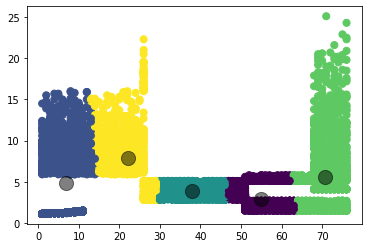

In [ ]:
plt.scatter(ex3_dataset[:, 0], ex3_dataset[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

For n_clusters = 5 The average silhouette_score is : 0.5298395487296218


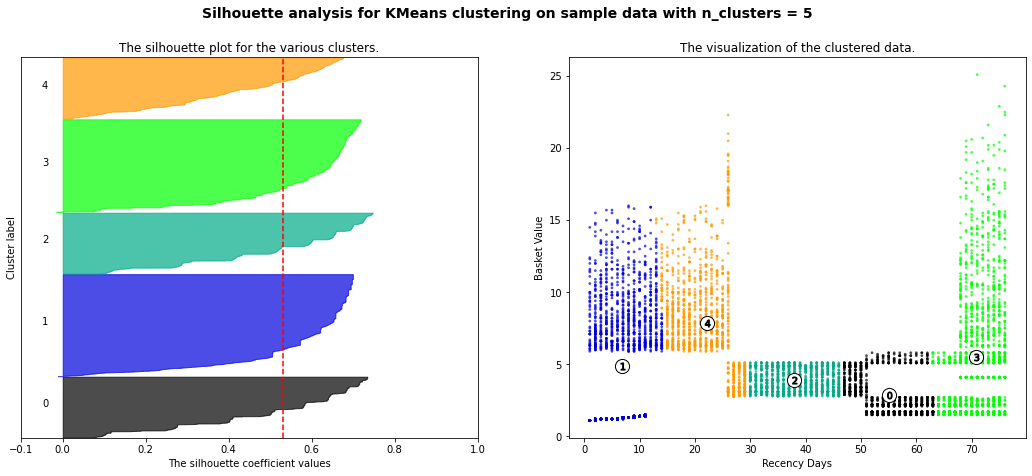

In [ ]:
# Create a subplot with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)

# The 1st subplot is the silhouette plot
# The silhouette coefficient can range from -1, 1 but in this example all
# lie within [-0.1, 1]
ax1.set_xlim([-0.1, 1])
# The (n_clusters+1)*10 is for inserting blank space between silhouette
# plots of individual clusters, to demarcate them clearly.
ax1.set_ylim([0, len(ex3_dataset) + (5 + 1) * 10])

# Initialize the clusterer with n_clusters value and a random generator
# seed of 10 for reproducibility.
clusterer = kmeans
cluster_labels = y_kmeans

# The silhouette_score gives the average value for all the samples.
# This gives a perspective into the density and separation of the formed
# clusters
silhouette_avg = silhouette_score(ex3_dataset, cluster_labels)
print(
    "For n_clusters =",
    5,
    "The average silhouette_score is :",
    silhouette_avg,
)

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(ex3_dataset, cluster_labels)

y_lower = 10
for i in range(5):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / 5)
    ax1.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7,
    )

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

# 2nd Plot showing the actual clusters formed
colors = cm.nipy_spectral(cluster_labels.astype(float) / 5)
ax2.scatter(
    ex3_dataset[:, 0], ex3_dataset[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
)

# Labeling the clusters
centers = clusterer.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(
    centers[:, 0],
    centers[:, 1],
    marker="o",
    c="white",
    alpha=1,
    s=200,
    edgecolor="k",
)

for i, c in enumerate(centers):
    ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

ax2.set_title("The visualization of the clustered data.")
ax2.set_xlabel("Recency Days")
ax2.set_ylabel("Basket Value")

plt.suptitle(
    "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
    % 5,
    fontsize=14,
    fontweight="bold",
)

plt.show()

Αριθμητικά προφίλ των ομάδων:
>Ομάδα 1 --> Ομάδα πρόσφατων συναλλαγών, τελευταίες δύο εβδομάδες, πολύ χαμηλής, μεσαίας και υψηλής αξίας που αντιπροσωπεύει το 27.03% του συνόλου των συναλλαγών.

>Ομάδα 4 --> Ομάδα πρόσφατων συναλλαγών, αλλά από τη 15η έως περίπου την 29η μέρα, κυρίως μεσαίας αξίας που αντιπροσωπεύει το 16.12% του συνόλου των συναλλαγών.

>Ομάδα 2 --> Ομάδα προόσφατων και παρελθοντικών συναλλαγών, από τη 30η έως περίπου την 47η μέρα, χαμηλής και μεσαίας αξίας που αντιπροσωπεύει το 16.15% του συνόλου των συναλλαγών.

>Ομάδα 0 --> Ομάδα παρελθοντικών συναλλαγών, από τη 48η έως περίπου την 62η μέρα, χαμηλής και μεσαίας αξίας που αντιπροσωπεύει το 16.07% του συνόλου των συναλλαγών.

>Ομάδα 3 --> Ομάδα παρελθοντικών συναλλαγών, από τη 63η έως την 75η μέρα, χαμηλής, μεσαίας και υψηλής αξίας που αντιπροσωπεύει το 24.60% του συνόλου των συναλλαγών.

Με τον όρο πρόσφατων συναλλαγών εννοούμε recency_days <= mean(recency_days), ενώ με τον όρο παρελθοντικών συναλλαγών εννοούμε recency_days > mean(recency_days).

Ομοίως για την αξία συναλλαγών για τη περιοχή κοντά στο mean(basket_value) θεωρούμε τη μεσαία αξία, και εκτός αυτού του διαστήματος έχουμε τη χαμηλή και την υψηλή αξία.

Επίσης, στα silhouette scores φαίνεται αυτό που αναφέρουμε προηγούμενως, πως οι ομάδες 1 & 3, που αντιπρωσοπεύουν τις πρώτες και τελευταίες μέρες, έχουν μεγαλύτερη πυκνότητα αφού έγιναν περισσότερες συναλλαγές σε εκείνα τα διαστήματα. Για αυτό κιόλας αντιπρωσοπεύουν και περίπου το 52% του συνόλου των συναλλαγών μας.


**Πρόβλημα Clustering**: Παρατηρείται πως στις παλαιότερες συναλλαγές (ομάδα 3) είναι πιο συχνές αυτές της υψηλής αξίας σε σχέση με τις πιο πρόσφατες (ομάδες 1 & 4). Επίσης, ίσως να γινόταν καλύτερος διαχωρισμός των ομάδων αν χρησιμοποιούσαμε λιγότερες ομάδες, διότι η ομάδες 2 & 0 έχουν το ίδιο αριθμητικό προφίλ με μόνη διαφορά το χρονικό πλαίσιο στο οποίο αναφέρονται. Βέβαια, ίσως να γινόταν και ακόμα καλύτερος διαχωρισμός αν αυξάναμε τις ομάδες, έτσι ώστε να χωρίζουν τις συναλλαγές μας τόσο βάσει της χρονικής περιόδου, όσο και του κόστους, πράγμα το οποίο δεν συμβαίνει τώρα.

**Πρόβλημα Μάρκετινγκ**: Παρατηρείται πως στις πιο πρόσφατες και στις πιο παρελθοντικές μέρες είναι αυτές με τις περισσότερες συναλλαγές και μάλιστα στις παρελθοντικές είναι αυτές που εμφανίζεται να έχουν και την υψηλότερη αξία ταυτόχρονα. Σημαντικό, θα ήταν το τμήμα μάρκετινγκ να προσπαθηήσει να εντοπίσει ποιος παράγοντας ήταν αυτός που άυξησε τώρα και τότε τις συναλλαγές και το ύψος τους, διαφορετικά το κατάστημα μπορεί να υποστεί κάποια ζημιά, αφού για ένα σημαντικό διάστημα (τύπου 40 ημερών) μπορεί να κάνει πάλι μόνο 60-80 συναλλαγές ημερησίως που όλες θα είναι χαμηλής και μεσαίας αξίας. Αυτή η συμπεριφορά θα μπορούσε να έχει καταστροφικές συνέπειες, αν είναι επαναλαμβανόμενη.

**Συμπέρασμα**: Προβληματικές ομάδες θα αποκαλούσαμε την 2 & 0.

Τέλος, προσαρτήσαμε στο γενικό dataset μας το οποίο περιέχει και όλες τις προηγούμενες πληροφορίες που έχουμε εξάγει, 5 στήλες για να γνωρίζουμε κάθε φορά σε ποια ομάδα ανήκει μια συναλλαγή.

In [ ]:
temp = [[0 for i in range (0,5)] for j in range (0, len(y_kmeans))]
for i in range (0, len(y_kmeans)):
  temp[i][y_kmeans[i]] = 1
temp = pd.DataFrame(temp)
baskets_df.insert(3, 'Cluster4', temp[4])
baskets_df.insert(3, 'Cluster3', temp[3])
baskets_df.insert(3, 'Cluster2', temp[2])
baskets_df.insert(3, 'Cluster1', temp[1])
baskets_df.insert(3, 'Cluster0', temp[0])

In [ ]:
baskets_df.head()

,id,basket_value,recency_days,Cluster0,Cluster1,Cluster2,Cluster3,Cluster4,citrus fruit,tropical fruit,...,rolls/buns,chocolate,bottled water,yogurt,sausage,root vegetables,pastry,soda,cream,Value_range
0,1,1.1,2,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,low_basket_value
1,2,3.6,31,0,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,medium_basket_value
2,3,1.2,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,low_basket_value
3,4,6.6,7,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,high_basket_value
4,5,2.5,66,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,low_basket_value


# Άσκηση 4

Θα επαναλάβουμε την ίδια διαδικασία με την άσκηση 2 μόνο που αυτή τη φορά θα δώσουμε διαφορετική είσοδο στη συνάρτηση apriori. Κρατάμε τα προϊόντα και τα αποτελέσματα του K-means μόνο.

Διατηρούμε τη τιμή της ελάχιστης υποστήριξης στο 0.025 για να μπορούμε να συγκρίνουμε ξανά εύκολα τα συμπεράσματα μας με τα παραπάνω.

In [ ]:
ex4_dataset = baskets_df.drop(['basket_value','recency_days','Value_range','id'], axis=1)
freqItemSets = apriori(ex4_dataset, min_support=0.025, use_colnames=True)

Αυτή τη φορά παράγονται 100 σύνολα, εκ των οποίων 2 από τα 4 πρώτα είναι οι δύο μεγαλύτερες ομάδες που προέκυψαν από τον K-means.

In [ ]:
freqItemSets.sort_values(by="support", ascending=False)

,support,itemsets
7,0.333466,(whole milk)
1,0.270303,(Cluster1)
8,0.252521,(other vegetables)
3,0.246019,(Cluster3)
9,0.240048,(rolls/buns)
...,...,...
56,0.026008,"(tropical fruit, citrus fruit)"
18,0.026008,"(Cluster0, other vegetables)"
20,0.025876,"(yogurt, Cluster0)"
46,0.025610,"(Cluster4, citrus fruit)"


Παράγονται 190 κανόνες, όμως εμείς θα μελετήσουμε μόνο τους 20 πρώτους σύμφωνα με τη μετρική του confidence και ύστερα τους πρώτους για κάθε cluster γιατί δε καλύπτονται όλοι στους πρώτους 20.

Πλέον μπορούμε βάσει αυτόν των κανόνων να συσχετίσουμε ομάδες με προϊόντα και αυτό ακριβώς θα κάνουμε, σύμφωνα με τους 5 κανόνες που έχουν το υψηλότερο confidence και το δεξί ή αριστερό τους μέρος είναι κάποιος Cluster.

Τα συμπεράσματα μας ήταν τα εξής:
> Τα προϊόντα και οι συνδυασμοί που αγοράζονται κυριώς από την Ομάδα 0 είναι rolls/buns, yogurt, other vegetables και whole milk. Ωστόσο, να αναφέρουμε πως δεν μπορούμε να έχουμε μεγάλη εμπιστοσύνη στους κανόνες από τους οποίους αντλούμε αυτή τη γνώση, γιατί πρόκειται για μερικούς από τους κανόνες με το μικρότερο confidence, μόλις 0.1.

> Τα προϊόντα και οι συνδυασμοί που αγοράζονται κυριώς από την Ομάδα 1 είναι bottled water, sausage, whole milk, other vegetables και citrus fruit.

> Τα προϊόντα και οι συνδυασμοί που αγοράζονται κυριώς από την Ομάδα 2 είναι bottled water, soda, rolls/buns, yogurt, whole milk, other vegetables. Πάλι αυτή η γνώση αντλήθηκε από κανόνες χαμηλού confidence.

> Τα προϊόντα και οι συνδυασμοί που αγοράζονται κυριώς από την Ομάδα 3 είναι pastry και συνδυασμοί που τα εμπεριέχουν όπως: {pastry,soda}, {pastry, rolls/buns}, {whole milk, pastry}, {other vegetables, pastry}.

> Τα προϊόντα και οι συνδυασμοί που αγοράζονται κυριώς από την Ομάδα 4 είναι whole milk, sausage, root vegetables, tropical fruit, yogurt, citrus fruit, other vegetables.

Δεν αναφέρονται όλα τα προϊόντα που αντιστοιχούν σε κάθε ομάδα, αλλά μόνο αυτά που συναντήσαμε πρώτα, επομένως αυτά με κανόνες που έχουν το μεγαλύτερο confidence για τη κάθε ομάδα.

Όσον αναφορά τις προβληματικές ομάδες που αναφέραμε προηγουμένως (0 & 2), σχετίζονται με το προϊόν yogurt. Καταλήξαμε σε αυτό το συμπέρασμα παίρνοντας τις τομές από τα σύνολα των προϊόντων των προβληματικών ομάδων με την ένωση των συνόλων των λειτουργικών ομάδων. Το μόνο προϊόν που άνηκε μόνο σε προβληματικές ομάδες ήταν το yogurt.

Λόγοι για τους οποίους μπορεί να προκλήθηκε αυτή τη δυσλειτουργία:
*   Άυξηση των τιμών των υπόλοιπων προϊόντων με αποτέλεσμα να μην τα αγοράζει πολύς κόσμος εκείνο το διάστημα.
*   Έλλειμα των προτιμητέων προϊόντων με αποτέλεσμα οι καταναλατές να αγοράζουν το συγκεκριμένο για να συμπληρώσουν τη διατροφή τους.
*   Ταυτόχρονη αύξηση των τιμών των άλλων προϊόντων και μείωση της τιμής του yogurt.
*   Έξυπνη προώθηση του yogurt μέσω διαφημίσεων και influencing για ένα πιο υγιεινό τρόπο ζωής, με αποτέλεσμα οι καταναλωτές να αποφύγουν κάποια άλλα προϊόντα.
*   Μποϊκοτάζ της εταιρίας προμήθευσης των προϊόντων του καταστήματος που δεν ταυτίζεται με την εταιρία προμήθευσης του yogurt.

*Θεωρώντας πως στο διάστημα εκείνο δεν έγινε κάποια άλλη πολύ μεγαλύτερη αλλαγή που δε θα μπορούσαμε να προβλέψουμε, ανατίμηση του νομίσματος, πόλεμος, κάποια φυσική καταστροφή μεγάλης κλίμακας κτλ.

In [ ]:
association_rules(freqItemSets, metric="confidence", min_threshold=0.0).sort_values(by="confidence", ascending=False).head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
156,"(pastry, whole milk)",(Cluster3),0.043392,0.246019,0.043392,1.000000,4.064725,0.032717,inf
55,(pastry),(Cluster3),0.116109,0.246019,0.116109,1.000000,4.064725,0.087544,inf
168,"(rolls/buns, pastry)",(Cluster3),0.027335,0.246019,0.027335,1.000000,4.064725,0.020610,inf
162,"(pastry, other vegetables)",(Cluster3),0.029459,0.246019,0.029459,1.000000,4.064725,0.022211,inf
174,"(soda, pastry)",(Cluster3),0.027468,0.246019,0.027468,1.000000,4.064725,0.020710,inf
155,"(Cluster3, whole milk)",(pastry),0.063694,0.116109,0.043392,0.681250,5.867314,0.035996,2.772990
161,"(Cluster3, other vegetables)",(pastry),0.045117,0.116109,0.029459,0.652941,5.623503,0.024220,2.546804
179,"(yogurt, other vegetables)",(whole milk),0.056661,0.333466,0.029061,0.512881,1.538029,0.010166,1.368317
186,"(root vegetables, other vegetables)",(whole milk),0.061837,0.333466,0.030255,0.489270,1.467227,0.009634,1.305062
184,"(whole milk, root vegetables)",(other vegetables),0.063827,0.252521,0.030255,0.474012,1.877119,0.014137,1.421096


Έπειτα, προσαρτούμε και τις στείλες για τη διακριτοποιημένη αξία καλαθιού και εκτελούμε ξανά τη μέθοδο apriori.

In [ ]:
high = []
medium = []
low = []
for i in range (0,len(value_ranges)):
  if value_ranges[i] == 'low_basket_value' :
    high.append(0)
    medium.append(0)
    low.append(1)
  elif value_ranges[i] == 'medium_basket_value':
    high.append(0)
    medium.append(1)
    low.append(0)
  else:
    high.append(1)
    medium.append(0)
    low.append(0)

ex4_dataset.insert(0,'low_basket_value', low)
ex4_dataset.insert(0,'medium_basket_value', medium)
ex4_dataset.insert(0,'high_basket_value', high)


In [ ]:
freqItemSets = apriori(ex4_dataset, min_support=0.025, use_colnames=True)

In [ ]:
freqItemSets.sort_values(by="support", ascending=False)

,support,itemsets
2,0.352840,(low_basket_value)
1,0.335722,(medium_basket_value)
10,0.333466,(whole milk)
0,0.311438,(high_basket_value)
4,0.270303,(Cluster1)
...,...,...
89,0.025610,"(Cluster4, citrus fruit)"
132,0.025610,"(yogurt, sausage)"
178,0.025610,"(high_basket_value, yogurt, sausage)"
191,0.025345,"(low_basket_value, Cluster0, rolls/buns)"


Παράγονται 207 σύνολά αντικειμένων αυτή τη φορά και με αυτά παράγουμε 644 κανόνες συνολικά. Αρκετούς παραπάνω δηλαδή από τις προηγούμενες φορές, λόγικο βέβαια εφόσον πλέον χρησιμοποιούμε όλες τις νέες μεταβλητές που έχουμε παράγει.

Πρώτο πράγμα το οποίο τραβάει τη προσοχή μας είναι πως οι πρώτοι 20 κανόνες που παράγοντες έχουν όλοι confidence 1. Επίσης, πλέον βλέπουμε κανόνες που επιβεβαιώνουν πράγματα που έχουμε αναφέρει παραπάνω.

**Για παράδειγμα:** Κάναμε την υπόθεση πως στην ομάδα 3 ανήκουν οι περισσότερες συναλλαγές υψηλής αξίας και επίσης προβλέψαμε κάποια προϊόντα που συσχετίζονται με αυτή την ομάδα και τώρα έχουμε κανόνες που συνδυάζουν αυτές τις πληροφορίες. Δηλαδή αν έχουμε high_basket_value μάζι με κάποια από τα συσχετιζόμενα προϊόντα η συναλλαγή αυτή θα ανήκει πάντα στην Ομάδα 3.

Επίσης, πράγμα που παρατηρούμε με την πλέον αύξηση της πληροφορίας είναι πως για συγκεκριμένες μεταβλητές που προηγουμένως είχαμε λίγους κανόνες χαμηλού confidence, τώρα μπορεί να έχουν προκύψει περισσότεροι και ορισμένοι μεγάλου confidence. Επομένως, πλέον θα μπορούμε να αποφανθούμε καλύτερα για αυτές τις μεταβλητές. Για παράδειγμα, προηγουμένως προσπαθούσαμε να συσχετίσουμε την Ομάδα 2 με κάποια προϊόντα, όμως είχαμε μόνο κανόνες χαμηλού confidence, ένω τώρα για παράδειγμα μπορούμε να συμπεράνουμε πως αν μια συναλλαγή ανήκει στην ομάδα 2 και περιέχει το αγαθό bottled water ή rolls/buns, τότε είναι συναλλαγή μεσαίας αξίας. Επίσης, από το κανόνα με id 59 μαθαίνουμε με confidence ίσο με 0.6 πως αν μια συναλλαγή ανήκει στην Ομάδα 0 τότε είναι συναλλαγή χαμηλής αξίας, άλλο ένα στοιχείο πως ή ομάδα 0 είναι προβληματική.

Προς την Ομάδα Μάρκετινγκ: Πλέον υπάρχουν αρκετοί κανόνες για να αναλύσουν, να ανακαλύψουν τα πιο προτιμητέα προϊόντα που σχετίζονται τόσο με καλάθια μεγάλης αξίας, με τις πιο λειτουργικές ομάδες αλλά και συνδυασμό αυτών των δύο. Ύστερα το μόνο που μένει είναι η κατάλληλη προώθηση τους με σκόπο την αύξηση του κέρδους του καταστήματος.

In [ ]:
association_rules(freqItemSets, metric="confidence", min_threshold=0.1).sort_values(by="confidence", ascending=False).head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
498,"(Cluster2, rolls/buns)",(medium_basket_value),0.040870,0.335722,0.040870,1.0,2.978656,0.027149,inf
620,"(high_basket_value, pastry, other vegetables)",(Cluster3),0.027203,0.246019,0.027203,1.0,4.064725,0.020510,inf
572,"(pastry, whole milk)",(Cluster3),0.043392,0.246019,0.043392,1.0,4.064725,0.032717,inf
589,"(pastry, soda)",(Cluster3),0.027468,0.246019,0.027468,1.0,4.064725,0.020710,inf
132,(pastry),(Cluster3),0.116109,0.246019,0.116109,1.0,4.064725,0.087544,inf
505,"(Cluster2, bottled water)",(medium_basket_value),0.027070,0.335722,0.027070,1.0,2.978656,0.017982,inf
449,"(rolls/buns, sausage)",(high_basket_value),0.039942,0.311438,0.039942,1.0,3.210908,0.027502,inf
294,"(high_basket_value, pastry)",(Cluster3),0.076433,0.246019,0.076433,1.0,4.064725,0.057629,inf
605,"(high_basket_value, Cluster3, whole milk)",(pastry),0.036624,0.116109,0.036624,1.0,8.612571,0.032372,inf
606,"(high_basket_value, pastry, whole milk)",(Cluster3),0.036624,0.246019,0.036624,1.0,4.064725,0.027614,inf
